In [1]:
import os

from openai import OpenAI
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
)

from langchain_openai import ChatOpenAI
llm_model = 'gpt-4o-mini'
chat_model = ChatOpenAI(temperature=0, model=llm_model)

In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [5]:
from langchain_core.messages import AIMessage, HumanMessage

msg1 = [HumanMessage(content="안녕하세요?", id="1")]
msg2 = [AIMessage(content="반갑습니다~", id="2")]
msg3 = [HumanMessage(content="안녕하세요?", id="1")]
msg4 = [HumanMessage(content="반갑습니다~", id="1")]

result1 = add_messages(msg1, msg2)
result2 = add_messages(msg3, msg4)

print('==== result1 ====')
print(result1)
print('==== result2 ====')
print(result2)

==== result1 ====
[HumanMessage(content='안녕하세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]
==== result2 ====
[HumanMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='1')]


In [9]:
graph_builder = StateGraph(State)

def chatbot(state: State):
    return {"messages": [chat_model.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

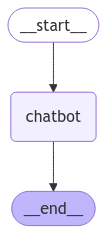

In [11]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
res = graph.invoke({"messages": ["Hello, how are you?"]})
print(res["messages"])

[HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='b94920e5-af83-4003-b899-bc5c5f55ab45'), AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bba3c8e70b', 'finish_reason': 'stop', 'logprobs': None}, id='run-748e822c-400a-4c6f-b59d-c1ed59c93f66-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]


In [15]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: 안녕하세요! 어떻게 도와드릴까요?
Assistant: 안녕하세요, 피노키오! 만나서 반가워요. 어떻게 도와드릴까요?
Assistant: 2024년 한국의 비상계엄에 대한 구체적인 정보는 제가 알고 있는 데이터 범위인 2023년 10월까지는 없습니다. 비상계엄은 일반적으로 국가의 안전이나 질서를 유지하기 위해 정부가 특정 상황에서 발동하는 조치로, 정치적, 사회적 상황에 따라 다르게 적용될 수 있습니다. 만약 최근에 발생한 사건이나 발표에 대한 정보가 필요하시다면, 최신 뉴스나 공식 발표를 참고하시기를 권장합니다.
Assistant: 죄송하지만, 저는 이전 대화 내용을 기억하지 못합니다. 당신의 이름을 알려주시면 좋겠습니다!
Assistant: 네, 알겠습니다! 필요하신 것이 있으면 언제든지 말씀해 주세요. 좋은 하루 되세요!
Goodbye!
